In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
data = pd.read_csv("greatlakedata/clair1918.csv", header = 2, index_col = 0) #read data
data = data.drop([2021, 2022]) #drop years with nan values
a = data.unstack().values #unstack 2d data into one long 1d list
a

array([174.59, 175.14, 174.3 , ..., 175.47, 175.68, 175.63])

In [9]:
data_average = np.mean(a) #standardization
data_deviation = np.std(a)
for i in range(len(a)):
    a[i] -= data_average
    a[i] /= data_deviation

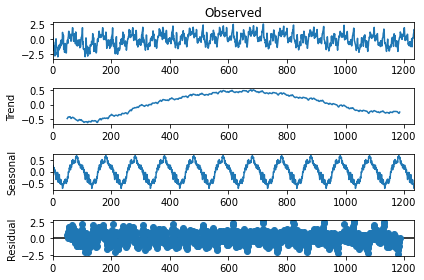

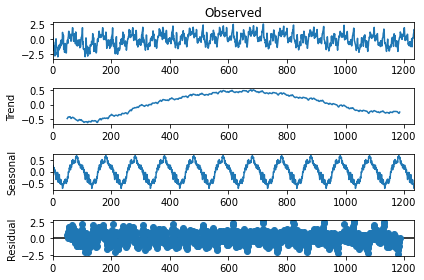

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a, model='additive', period = 100) 
result.plot()

<function matplotlib.pyplot.show(*args, **kw)>

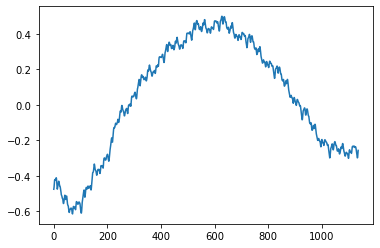

In [11]:
data=result.trend[np.logical_not(np.isnan(result.trend))]
x=np.arange(0,data.size)
plt.plot(x,data)
plt.show


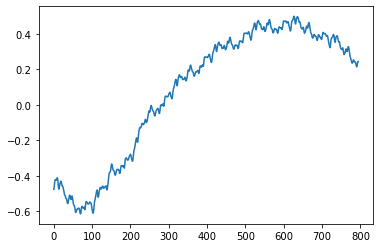

In [12]:
train_x = x[:int(0.70*x.size)]
train_y = data[:int(0.70*x.size)]

test_x = x[int(0.70*x.size):]
test_y = data[int(0.70*x.size):]
plt.plot(train_x,train_y)
plt.show()

线性回归平均绝对误差1:  0.13888424441758995
线性回归均方误差1:  0.025021846487561544
线性回归平均绝对误差predict:  0.9673058469287307
线性回归均方误差predict:  1.0335103835787465


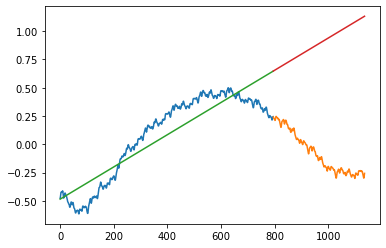

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x.reshape(len(train_x),1), train_y.reshape(len(train_y),1))
results=model.predict(train_x.reshape(len(train_x),1))
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
plt.plot(train_x,results)
pred = model.predict(test_x.reshape(len(test_x),1))
plt.plot(test_x,pred)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("线性回归平均绝对误差1: ", mean_absolute_error(train_y, results.flatten()))
print("线性回归均方误差1: ", mean_squared_error(train_y, results.flatten()))
print("线性回归平均绝对误差predict: ", mean_absolute_error(test_y, pred.flatten()))
print("线性回归均方误差predict: ", mean_squared_error(test_y, pred.flatten()))

2 次多项式回归平均绝对误差2:  0.062429727338657676
2 次多项式均方根误差2:  0.00740049564058577
2 次多项式回归平均绝对误差2:  0.17929737157776948
2 次多项式均方根误差2:  0.03712156092996335


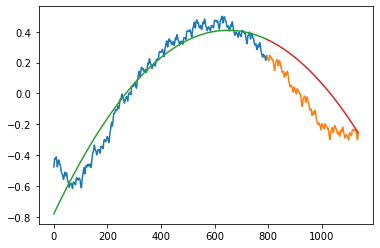

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_train_x_2 = poly_features_2.fit_transform(train_x.reshape(len(train_x),1))
poly_test_x_2 = poly_features_2.fit_transform(test_x.reshape(len(test_x),1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
model.fit(poly_train_x_2, train_y.reshape(len(train_x),1)) # 训练模型
results_2 = model.predict(poly_train_x_2) # 预测结果
results_2.flatten()
pred_2 = model.predict(poly_test_x_2) # 预测结果
pred_2.flatten() # 打印扁平化后的预测结果
plt.plot(train_x,results_2)
plt.plot(test_x,pred_2)

print("2 次多项式回归平均绝对误差2: ", mean_absolute_error(train_y, results_2))
print("2 次多项式均方根误差2: ", mean_squared_error(train_y, results_2))
print("2 次多项式回归平均绝对误差2: ", mean_absolute_error(test_y, pred_2))
print("2 次多项式均方根误差2: ", mean_squared_error(test_y, pred_2))




6 degree mae:  0.030980170897289824
6 degree mse:  0.0015854702712072948
6 degree mae predicted:  5.684673049063304
6 degree mse predicted:  68.02903091462323
---
7 degree mae:  0.02907899557758435
7 degree mse:  0.0014540982200397774
7 degree mae predicted:  1.557940556496747
7 degree mse predicted:  7.326330564142654
---
8 degree mae:  0.03056174541814339
8 degree mse:  0.001524113863836391
8 degree mae predicted:  35.700718201619786
8 degree mse predicted:  3338.553007857323
---
9 degree mae:  0.04702017288229061
9 degree mse:  0.0032653737987672514
9 degree mae predicted:  125.70009231185615
9 degree mse predicted:  43816.95046493658
---
10 degree mae:  0.06915252287319902
10 degree mse:  0.006830940752580699
10 degree mae predicted:  323.41179066093235
10 degree mse predicted:  307593.93340733496
---


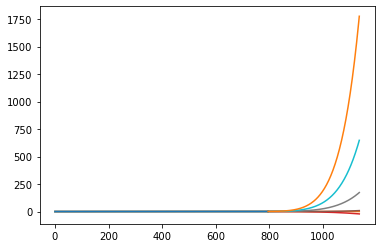

In [15]:
from sklearn.pipeline import make_pipeline
plt.plot(train_x,train_y)
plt.plot(test_x,test_y)
train_x = train_x.reshape(len(train_x),1)
test_x = test_x.reshape(len(test_x),1)
train_y = train_y.reshape(len(train_y),1)

for m in [6,7,8,9,10]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y)
    new_y = model.predict(train_x)
    pre_y = model.predict(test_x)
    plt.plot(train_x,new_y)
    plt.plot(test_x,pre_y)
    print("{} degree mae: ".format(m), mean_absolute_error(train_y, new_y.flatten()))
    print("{} degree mse: ".format(m), mean_squared_error(train_y, new_y.flatten()))
    print("{} degree mae predicted: ".format(m), mean_absolute_error(test_y, pre_y.flatten()))
    print("{} degree mse predicted: ".format(m), mean_squared_error(test_y, pre_y.flatten()))
    print("---")


MSE 计算结果:  [1.0335103835787465, 0.03712156092996335, 1.1278703315737937, 0.8439185863181494, 13.19218862795645, 68.02903091462323, 7.326330564142654, 3338.553007857323, 43816.95046493658, 307593.93340733496, 1626468.7017164773, 7296935.460967485, 29881948.307418503, 110878185.62496561, 69037965.91393802, 198614227.09776148, 554524074.0671917, 1508902057.4661384, 4015449813.809201, 10480609990.089537]


Text(0, 0.5, 'MSE Predicted')

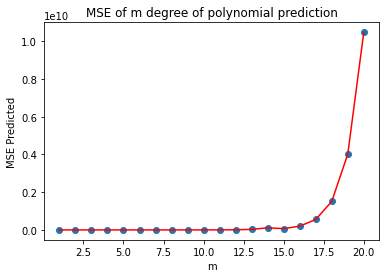

In [16]:
mse = [] # 用于存储各最高次多项式 MSE 值
m = 1 # 初始 m 值
m_max = 20 # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(train_x, train_y) # 训练模型
    pre_y = model.predict(test_x) # 测试模型
    mse.append(mean_squared_error(test_y, pre_y.flatten())) # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial prediction")
plt.xlabel("m")
plt.ylabel("MSE Predicted")


MP fitting


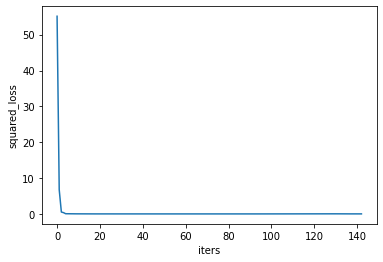

0.0026582666738075734
1
143


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
fonts = FontProperties(fname = "/Library/Fonts/华文细黑.ttf",size=14)

from sklearn import metrics
from sklearn.model_selection import train_test_split
## 忽略提醒
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
#PCA
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
## 定义含有4个隐藏层的MLP网络
mlpr = MLPRegressor(hidden_layer_sizes=(68,68,68,68,68,68,68), ## 隐藏层的神经元个数
                    activation='relu', 
                    solver='adam', 
                    alpha=0.0001,   ## L2惩罚参数
                    max_iter=100000, 
                    learning_rate="adaptive",
                    learning_rate_init=0.001,
                    n_iter_no_change=50,
                    warm_start=True
                   )

## 拟合训练数据集
mlpr.fit(train_x,train_y)
## 可视化损失函数
print('MP fitting')
plt.figure()
plt.plot(mlpr.loss_curve_)
plt.xlabel("iters")
plt.ylabel(mlpr.loss)
plt.show()
print(mlpr.best_loss_)
print(mlpr.n_features_in_)
print(mlpr.n_iter_)

mse:
0.21358195481610182


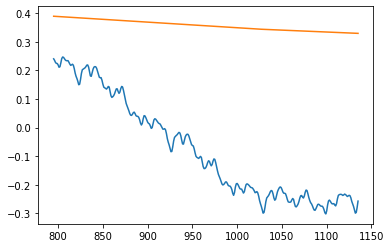

In [83]:

plt.plot(test_x,test_y)

plt.plot(test_x,mlpr.predict(test_x))
print("mse:")
print(mean_squared_error(test_y, mlpr.predict(test_x)))

In [3]:
import torch
torch.__version__


'1.6.0'

In [5]:
import sklearn
sklearn.__version__

'0.23.1'